# SMA Crossover Strategy Backtest

This notebook demonstrates how to implement and backtest a Simple Moving Average (SMA) crossover strategy using the Quantlib framework.

## Strategy Overview
The SMA crossover strategy is a trend-following strategy that generates trading signals based on the intersection of two moving averages:
- Buy when the shorter-term SMA crosses above the longer-term SMA
- Sell when the shorter-term SMA crosses below the longer-term SMA

## Setup and Imports
First, let's import the necessary modules and check our Python environment:

In [20]:
import sys
print(f"Using Python from: {sys.executable}")

from Quantlib.visualization.visualize import (
    plot_equity_curve,
    plot_drawdown,
    plot_signals,
    save_trade_log
)

from Quantlib.strategies.sma_crossover import SMACrossover
from Quantlib.backtest.engine import run_backtest
import os

Using Python from: /opt/anaconda3/bin/python


## Running the Backtest

Now we'll run the backtest with the following parameters:
- Initial capital: $100,000
- Trade size: 10% of portfolio per trade
- Data: BTC daily prices

In [21]:
# Verify data file exists
data_path = "../data/BTC-Daily.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found at {data_path}. Please check the file path.")

print("Running backtest...")
df, trades = run_backtest(
    strategy_class=SMACrossover,  # Using SMACrossover strategy class
    data_path=data_path,
    cash=100000,
    plot=True,
    kwargs={'trade_size': 0.1}  # Trading with 10% of portfolio
)
print("Backtest completed successfully")

Running backtest...
Index(['unix', 'datetime', 'symbol', 'open', 'high', 'low', 'close', 'volume',
       'volume usd'],
      dtype='object')
2015-02-03 BUY EXECUTED, 237.97
2015-02-04 SELL EXECUTED, 227.35
2015-02-20 BUY EXECUTED, 240.59
2015-03-25 SELL EXECUTED, 246.93
2015-05-07 BUY EXECUTED, 229.78
2015-05-28 SELL EXECUTED, 235.34
2015-05-30 BUY EXECUTED, 236.02
2015-05-31 SELL EXECUTED, 232.07
2015-06-18 BUY EXECUTED, 245.78
2015-08-08 SELL EXECUTED, 279.01
2015-09-13 BUY EXECUTED, 235.61
2015-09-22 SELL EXECUTED, 226.15
2015-10-02 BUY EXECUTED, 237.15
2015-11-20 SELL EXECUTED, 326.51
2015-12-03 BUY EXECUTED, 359.11
2016-01-04 SELL EXECUTED, 430.79
2016-01-12 BUY EXECUTED, 448.00
2016-01-16 SELL EXECUTED, 360.00
2016-02-17 BUY EXECUTED, 407.51
2016-03-11 SELL EXECUTED, 416.00
2016-03-30 BUY EXECUTED, 415.43
2016-05-20 SELL EXECUTED, 436.30
2016-05-29 BUY EXECUTED, 522.13
2016-07-02 SELL EXECUTED, 674.55
2016-07-03 BUY EXECUTED, 702.48
2016-07-08 SELL EXECUTED, 638.89
2016-07-20 B

## Analyzing Results
Let's visualize the backtest results using different plots:

### 1. Equity Curve
Shows how our portfolio value changes over time:

Plotting equity curve...


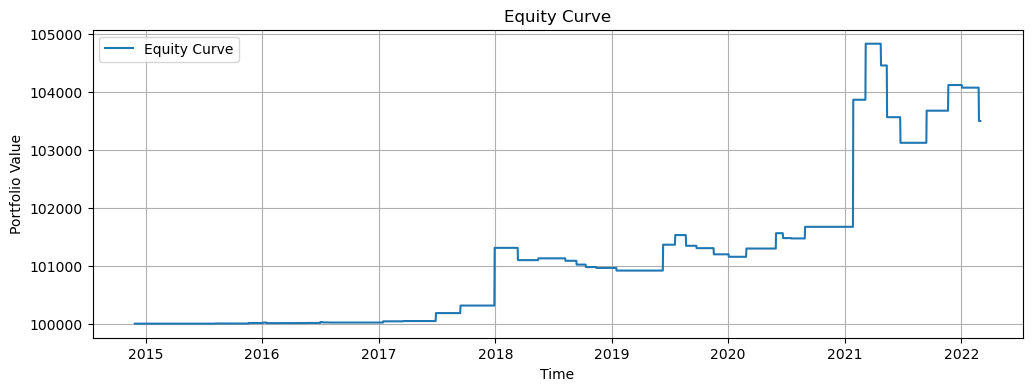

In [22]:
print("Plotting equity curve...")
plot_equity_curve(df["equity"])

### 2. Drawdown Analysis
Shows the magnitude and duration of portfolio drawdowns:

Plotting drawdown...


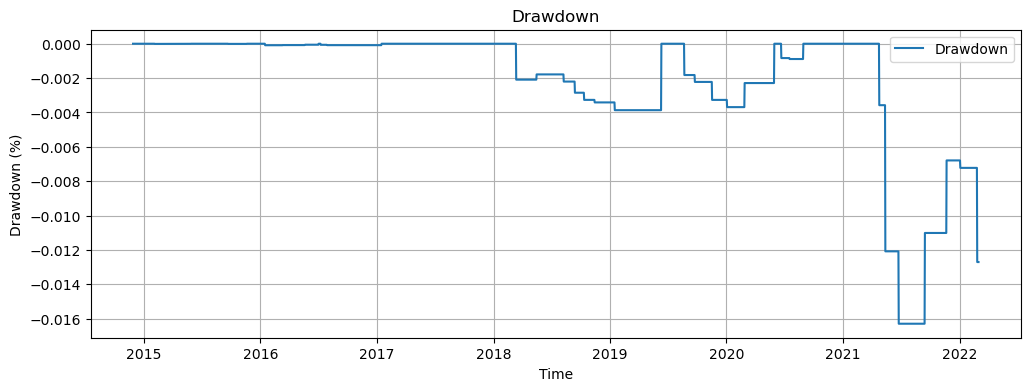

In [23]:
print("Plotting drawdown...")
plot_drawdown(df["equity"])

### 3. Trade Signals
Visualizes the buy and sell signals on the price chart:

Plotting trade signals...


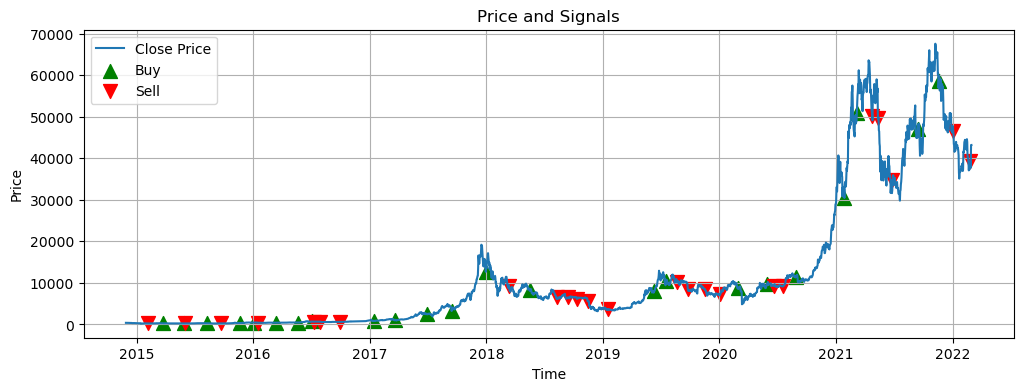

In [24]:
print("Plotting trade signals...")
plot_signals(df, df.get("buy_signal"), df.get("sell_signal"))

### 4. Trade Log
Save detailed information about each trade for further analysis:

In [25]:
print("Saving trade log...")
save_trade_log(trades)

Saving trade log...
✅ Trade log saved to: trades_log.csv


## Next Steps

To improve the strategy, you might want to:
1. Adjust the SMA periods
2. Modify the position sizing
3. Add stop-loss and take-profit rules
4. Test on different timeframes or assets 